
## Step 0: Setting up

The following cells make sure that environment is setup correctly, download the data if you don't have it already, and also check that GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Landmark_classification_tagging')
print(f"Current working directory: {os.getcwd()}")

Current working directory: /content/drive/MyDrive/Landmark_classification_tagging


In [ ]:
# Install requirements
# !pip install -r requirements.txt | grep -v "already satisfied"
!pip install livelossplot


Important! After you have ran pip install, please restart the kernel using the **Kernel** menu

In [ ]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
done
Reusing cached mean and std


---
## Step 1: Data


In [ ]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 4.01s ========================


### Visualize a Batch of Training Data

In [ ]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 2.71s ========================


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


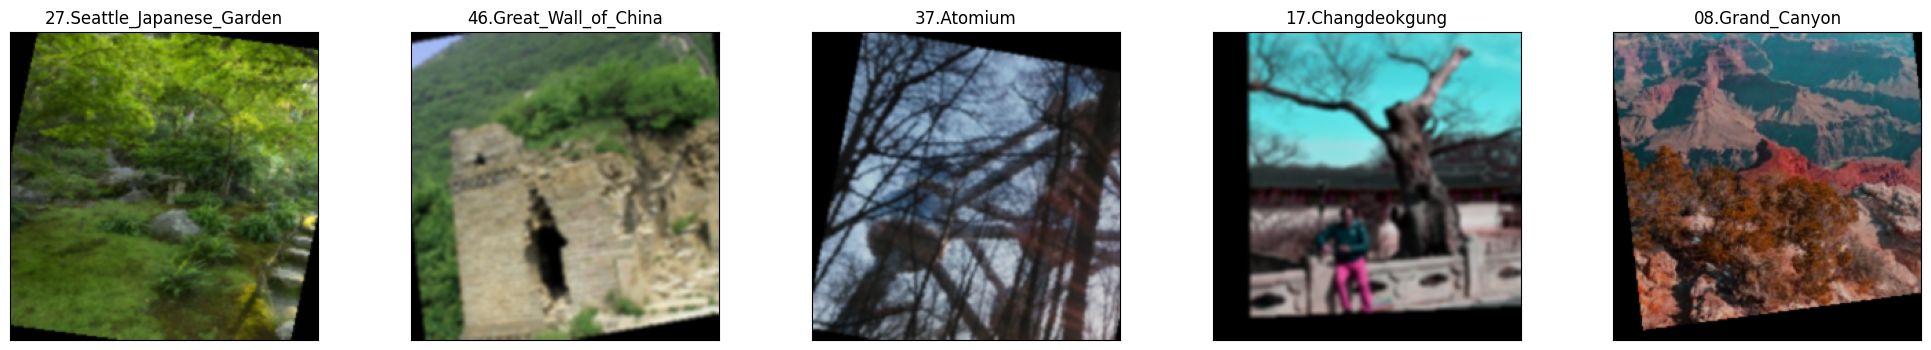

In [ ]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders
import multiprocessing

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=multiprocessing.cpu_count() (all CPUs)
data_loaders = get_data_loaders(batch_size=5, valid_size=0.01, num_workers=multiprocessing.cpu_count() )

visualize_one_batch(data_loaders)

In [ ]:
from src.data import  get_data_loaders
import multiprocessing


data_loaders = get_data_loaders(batch_size=5, valid_size=0.01, num_workers=multiprocessing.cpu_count() )



train_loader = data_loaders["train"]
train_length = len(train_loader.dataset)  # Total samples
train_batches = len(train_loader)         # Number of batches

print(f"Training samples: {train_length}")
print(f"Training batches: {train_batches}")
print(f"Class Names: {train_loader.dataset.classes}")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Training samples: 4996
Training batches: 990
Class Names: ['00.Haleakala_National_Park', '01.Mount_Rainier_National_Park', '02.Ljubljana_Castle', '03.Dead_Sea', '04.Wroclaws_Dwarves', '05.London_Olympic_Stadium', '06.Niagara_Falls', '07.Stonehenge', '08.Grand_Canyon', '09.Golden_Gate_Bridge', '10.Edinburgh_Castle', '11.Mount_Rushmore_National_Memorial', '12.Kantanagar_Temple', '13.Yellowstone_National_Park', '14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower', '17.Changdeokgung', '18.Delicate_Arch', '19.Vienna_City_Hall', '20.Matterhorn', '21.Taj_Mahal', '22.Moscow_Raceway', '23.Externsteine', '24.Soreq_Cave', '25.Banff_National_Park', '26.Pont_du_Gard', '27.Seattle_Japanese_Garden', '28.Sydney_Harbour_Bridge', '29.Petronas_Towers', '30.Brooklyn_Bridge', '31.Washington_Monument', '32.Hanging_Temple', '33.Sydney_Opera_House', '34.Great_Barrier_Reef', '35.Monumento_a_la

---
## Step 2: Define model, loss and optimizer


In [ ]:
!pytest -vv src/ResModel.py

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 3.13s ===============================


In [ ]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.42s ========================


In [ ]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.45s ========================


---
## Step 3: Train and Validate the Model


In [ ]:
!MODEL_TYPE=resnet pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.1, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/Landmark_classification_tagging
plugins: typeguard-4.4.4, langsmith-0.4.8, anyio-4.9.0
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

================= 1 passed, 3 deselected in 128.64s (0:02:08) ==================


In [ ]:
!MODEL_TYPE=resnet pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 7.84s ========================


In [ ]:
!MODEL_TYPE=resnet pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

======================= 1 passed, 3 deselected in 8.76s ========================


In [ ]:
!MODEL_TYPE=resnet pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.10.8, pytest-8.2.2, pluggy-1.5.0 -- /opt/conda/bin/python3.10
cachedir: .pytest_cache
rootdir: /root/project-3-starter-kit-AWS
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

======================= 1 passed, 3 deselected in 21.83s =======================


---
## Step 4: Putting everything together


In [ ]:
batch_size = 64    # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 100      # number of epochs for training
num_classes = 50      # number of classes. Do not change this
dropout = 0.4          # dropout for our model
learning_rate = 0.0001  # Learning rate for SGD (or Adam)
opt = 'adam'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001    # regularization. Increase this to combat overfitting

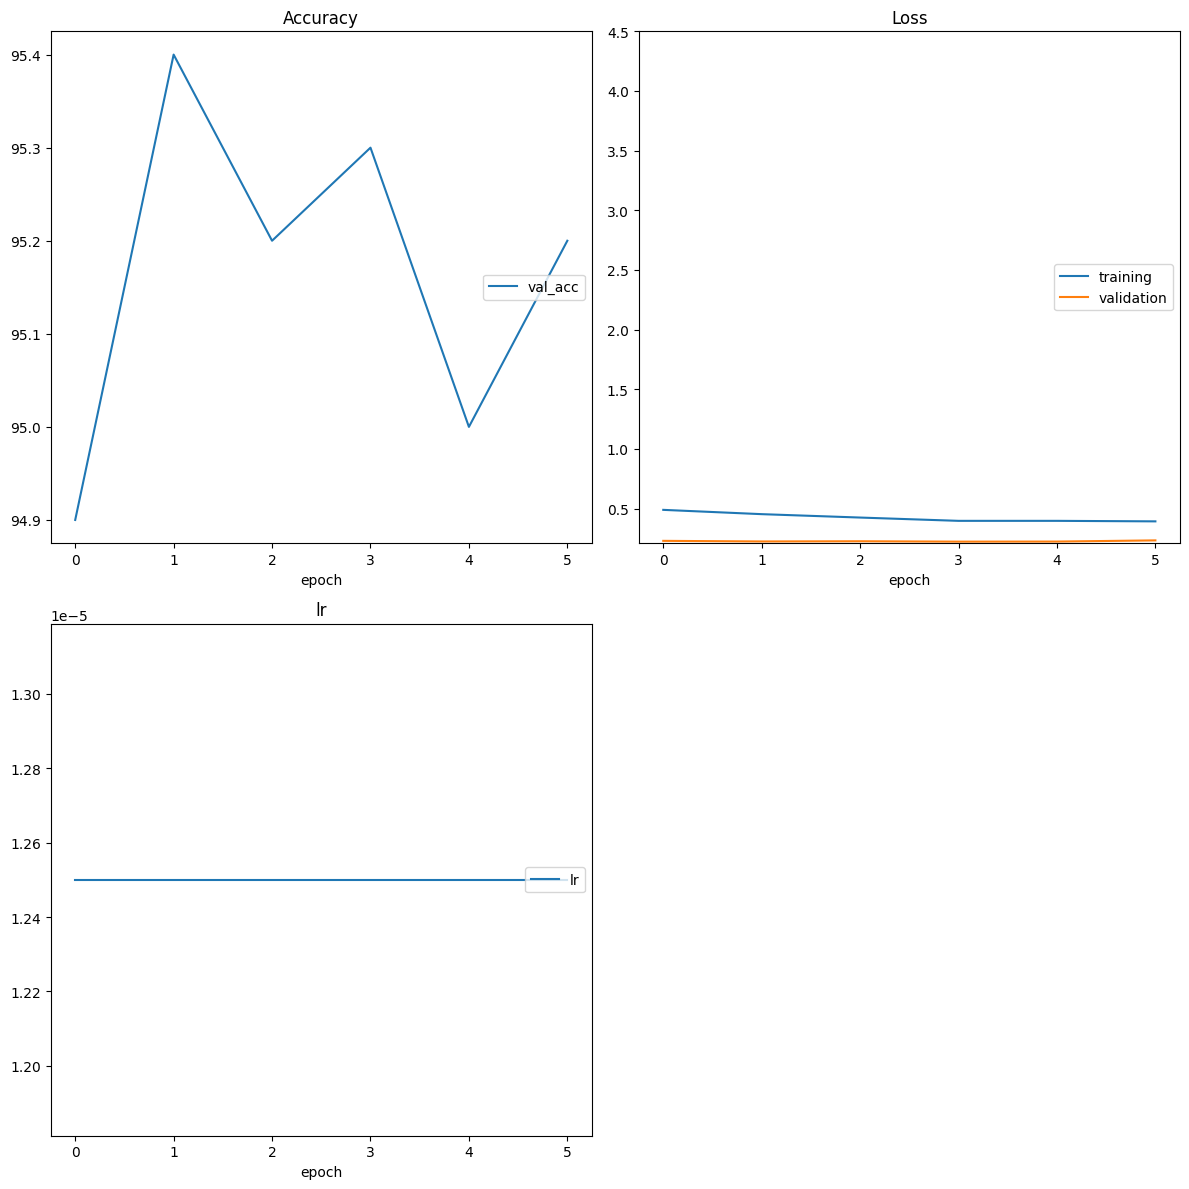

Epoch: 100 	Training Loss: 0.393065 	Validation Loss: 0.233607 	Validation Accuracy: 95.20%


In [ ]:
from src.data import get_data_loaders
from src.train_Res import optimize
from src.optimization import get_optimizer, get_loss
from src.ResModel import ResModel
import multiprocessing
import torch

# check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
# You can set the number of workers equal to the CPU count obtained using `multiprocessing.cpu_count()`.
gpu_kwargs = {
    "persistent_workers": True,
    "pin_memory": True,
    "pin_memory_device": 'cuda:0',
    "prefetch_factor": 4
}
data_loaders = get_data_loaders(
        batch_size=batch_size,
        valid_size=valid_size,
        num_workers=multiprocessing.cpu_count(),
        **gpu_kwargs)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = ResModel(num_classes,dropout).to(device)

print(model)
# Optionally, you can load your previous saved model here
# checkpoint_path = 'checkpoints/best_val_loss.pt'
# model.load_state_dict(torch.load(checkpoint_path))

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(
        model=model,
        optimizer= opt,
        learning_rate=learning_rate,
        weight_decay= weight_decay)

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_R1.pt",
    interactive_tracking=True,
    resume_training = True
)

---
## Step 5: testing against the Test Set

>  only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [ ]:
# load the model that got the best validation accuracy
from src.train_Res import one_epoch_test
from src.ResModel import ResModel
import torch

model = ResModel(num_classes=num_classes, dropout=dropout)

checkpoint_path = 'checkpoints/best_val_loss_R1.pt'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 20/20 [06:39<00:00, 19.99s/it]

Test Loss: 1.022663


Test Accuracy: 74% (937/1250)


(1.0226625472307207, tensor(74.9600))

---
## Step 6: Export using torchscript


In [ ]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.3.5, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/.shortcut-targets-by-id/1Dvk0aprcS80-G3Zobn9B5PFVxw-123-g/Landmark_classification_tagging
plugins: langsmith-0.4.4, anyio-4.9.0, typeguard-4.4.4
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

============================== 1 passed in 6.77s ===============================


Allright, now we are ready to export our model using our Predictor class:

In [ ]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.ResModel import ResModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = ResModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)


checkpoint_path = 'checkpoints/best_val_loss_R1.pt'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported_R.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


## Step 7: Load & Evaluate Exported Model


*   test exported model
*   Calculate F1 Score, classification report
*   visualize_comprehensive_metrics
*   plot confusion matrix




In [ ]:
from src.data import get_data_loaders
from src.optimization import  get_loss

data_loaders = get_data_loaders(batch_size=batch_size)
loss = get_loss()
class_names = data_loaders["train"].dataset.classes

Reusing cached mean and std
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


In [ ]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("checkpoints/original_exported_R.pt")

In [ ]:
import warnings

In [ ]:
from src.predictor import predictor_test

warnings.filterwarnings("ignore") # Disable warnings
pred, truth = predictor_test(data_loaders['test'], model_reloaded)
warnings.filterwarnings("default") # Re-enable warnings

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

print(f'F1 Score: {f1_score(truth, pred, average="micro")}, \n Accuracy: {accuracy_score(truth, pred)}, \nReport: {classification_report(truth, pred, target_names=class_names)}')

F1 Score: 0.748, 
 Accuracy: 0.748, 
Report:                                      precision    recall  f1-score   support

         00.Haleakala_National_Park       0.50      0.60      0.55        25
     01.Mount_Rainier_National_Park       0.59      0.64      0.62        25
                02.Ljubljana_Castle       0.77      0.80      0.78        25
                        03.Dead_Sea       0.53      0.36      0.43        25
                04.Wroclaws_Dwarves       0.67      0.80      0.73        25
          05.London_Olympic_Stadium       0.91      0.80      0.85        25
                   06.Niagara_Falls       0.83      0.80      0.82        25
                      07.Stonehenge       0.92      0.96      0.94        25
                    08.Grand_Canyon       0.57      0.64      0.60        25
              09.Golden_Gate_Bridge       0.81      0.68      0.74        25
                10.Edinburgh_Castle       0.71      0.68      0.69        25
11.Mount_Rushmore_National_Mem

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


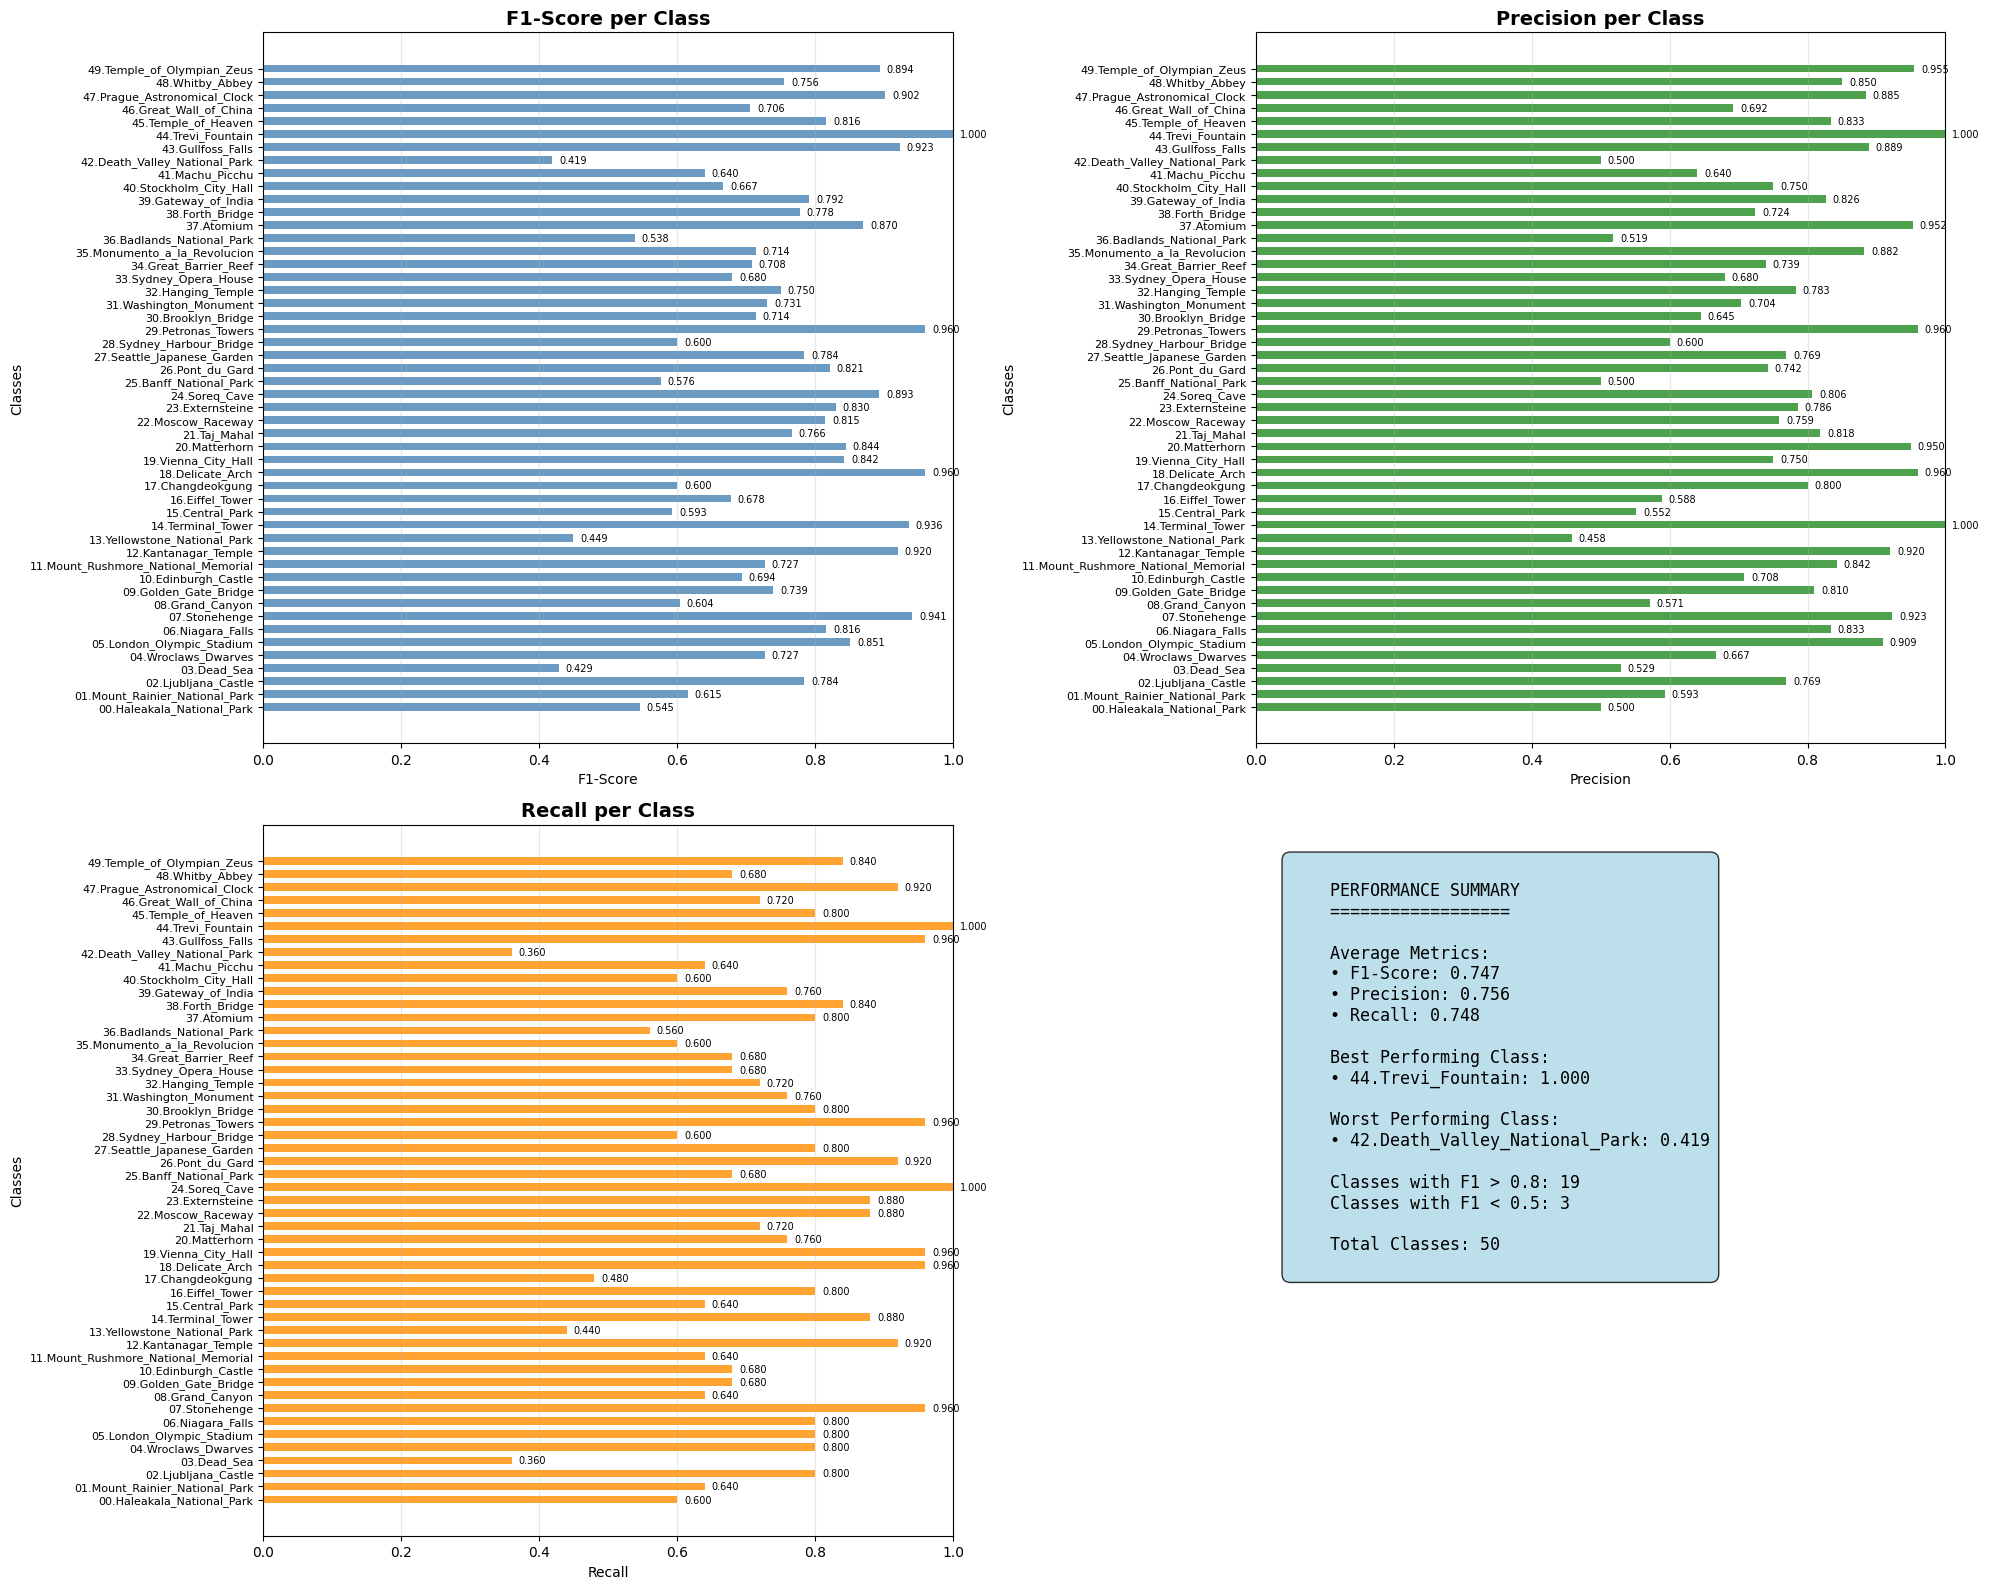

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from src.helpers import visualize_comprehensive_metrics

visualize_comprehensive_metrics(truth, pred, class_names)

Finally, let's have a look at the confusion matrix of the model we are going to use in production:

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._boots

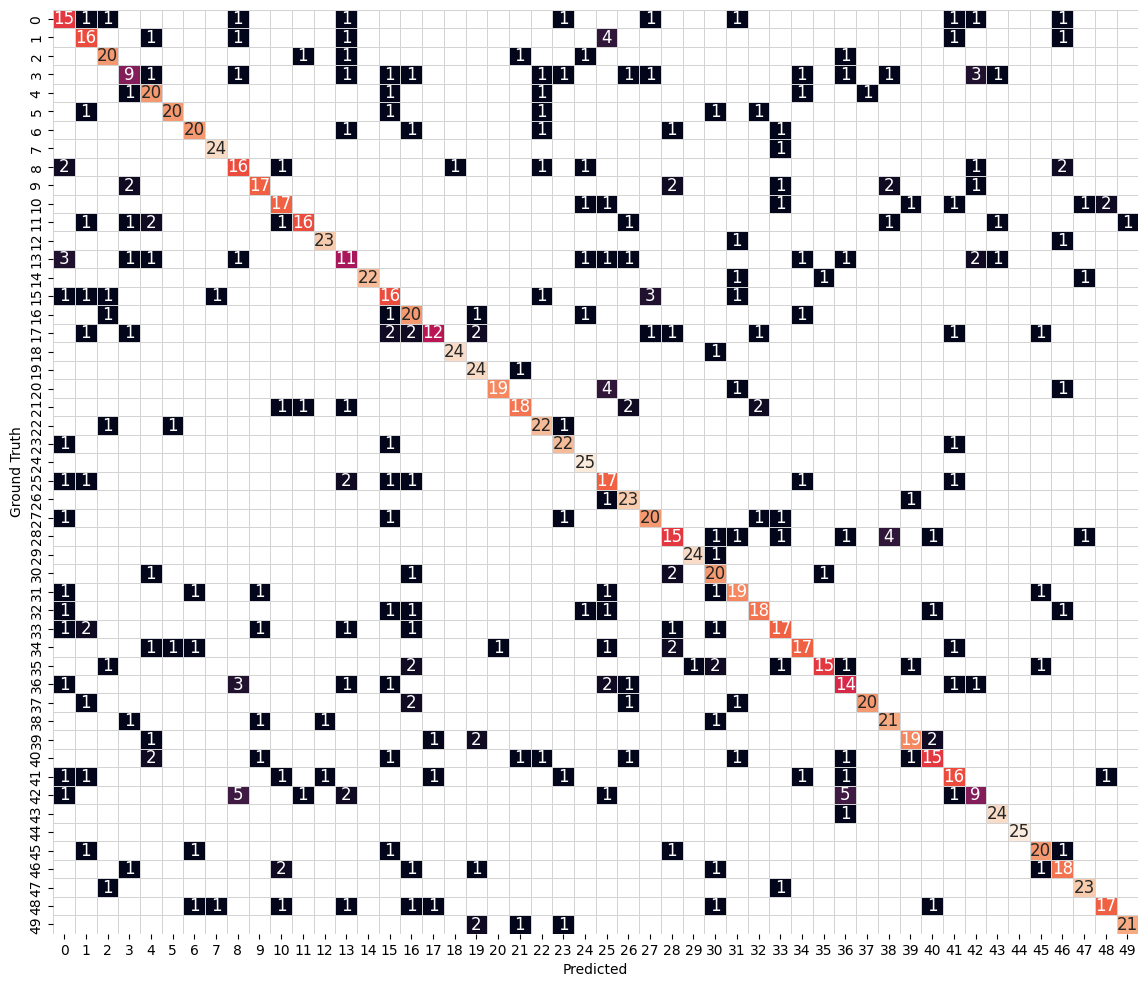

In [ ]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)

## Step 8: Try Grad-CAM

In [ ]:
from src.ResModel import ResModel
import torch
model = ResModel(num_classes=50, dropout=0.5).cpu()


In [ ]:
model

ResModel(
  (block1): ResidualBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential(
      (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block2): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


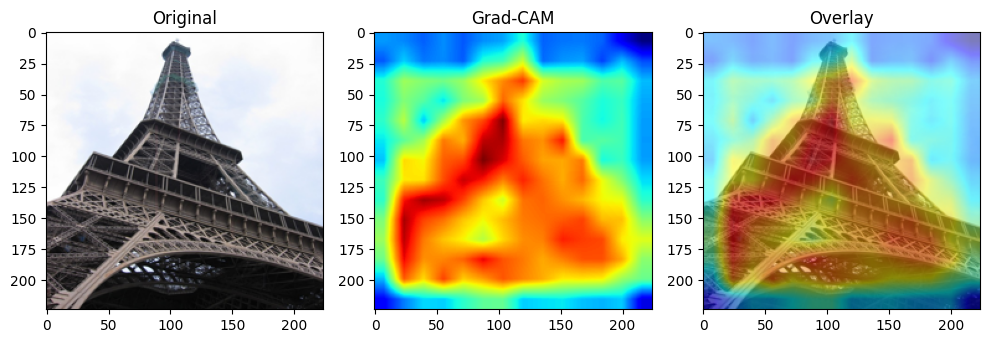

In [ ]:
from src.helpers import generate_grad_cam, plot_grad_cam

image_path = '/content/drive/MyDrive/Landmark_classification_tagging/landmark_images/train/16.Eiffel_Tower/08caf68108cf223d.jpg'
img, cam, _ = generate_grad_cam(image_path,model)
plot_grad_cam(img, cam)